In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [15]:
def singleimg(img, title, size, mincolor=0, maxcolor=255):
    fig, axis = plt.subplots(figsize=size)

    axis.imshow(img,cmap='gray',vmin=mincolor, vmax=maxcolor)
    axis.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    plt.show()


def showmultiple_image(img_array, title_array, size, x, y, mincolor=0, maxcolor=255):
    if(x<1 or y<1):
        print('Error: X e Y nao podem ser zero ou abaixo de zero!')
        return
    elif(x == 1 and y == 1):
        fig, axis = plt.subplots(y, figzise = size)
        yId = 0
        for img in img_array:
            axis[yId].imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
            axis[yId].set_achor('NW')
            axis[yId].set_title(title_array[yId], fontdict = {'fontesize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(title_array)
        xId = 0
        for img in img_array:
            axis[xId].imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
            axis[xId].set_anchor('NW')
            axis[xId].set_title(title_array[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in img_array:
            axis[yId, xId].set_title(title_array[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
            if(len(title_array[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

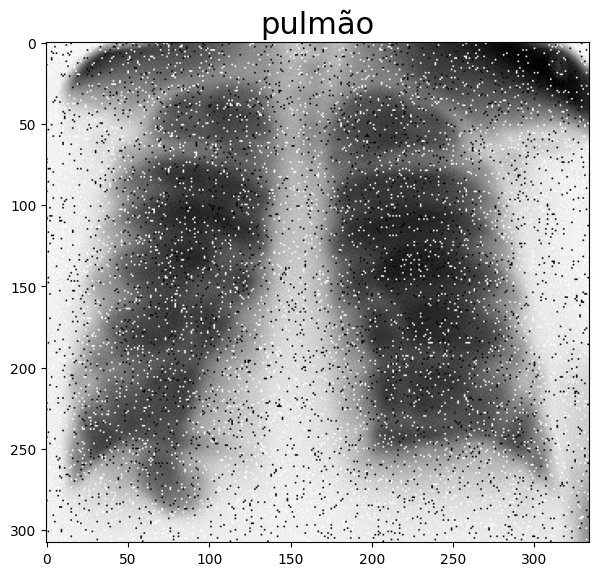

In [16]:
img_orig = cv.imread('img.png',0)
singleimg(img_orig, "pulmão", (7,7))

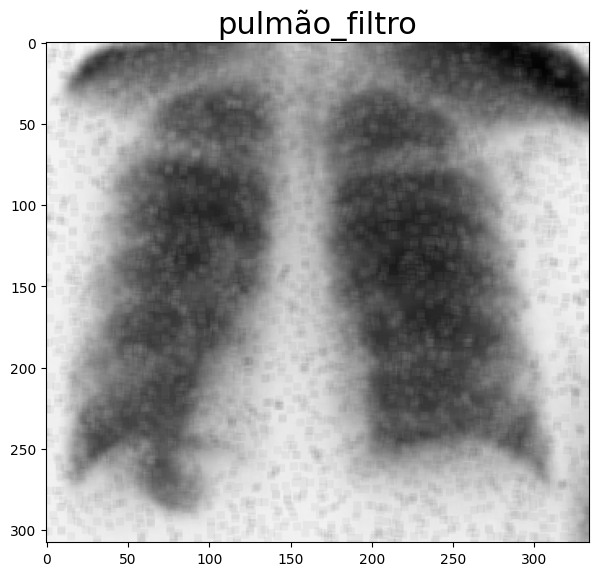

In [17]:
img_filtro = cv.blur(img_orig, (5,5))
singleimg(img_filtro, 'pulmão_filtro',(7,7))

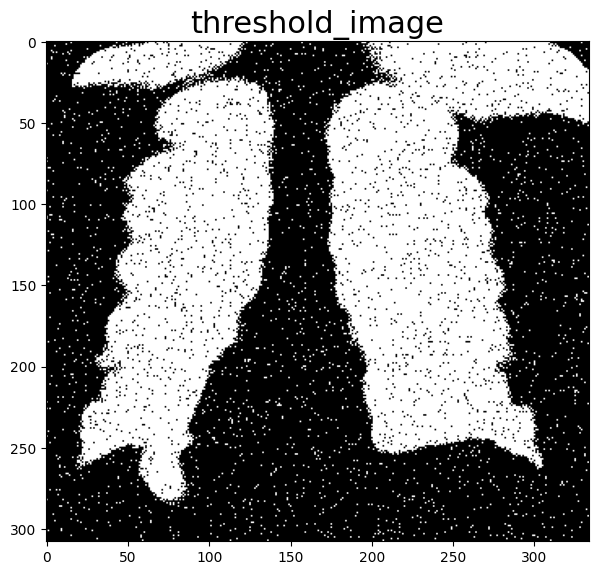

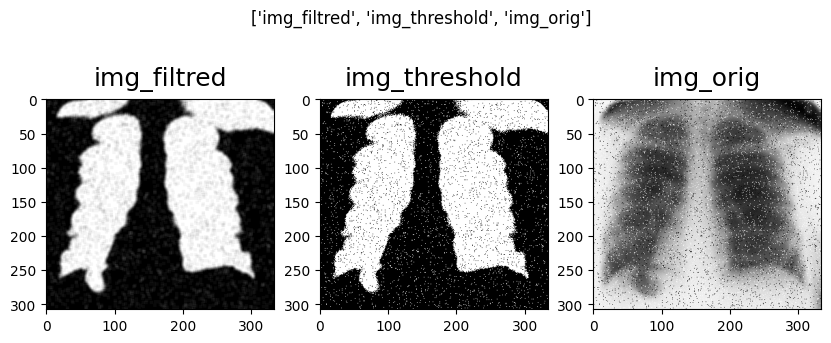

In [25]:
threshold, img_threshold = cv.threshold(img_orig, 127, 255, cv.THRESH_BINARY_INV)
singleimg(img_threshold, "threshold_image", (7,7))
img_filtred = cv.blur(img_threshold,(5,5))
title_array = ['img_filtred','img_threshold','img_orig']
showmultiple_image([img_filtred, img_threshold, img_orig], title_array , (10,9), 3, 1)